In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [3]:
file_path = "Data-Melbourne_F_Fixed.csv"
df = pd.read_csv(file_path)
df

,Serial No.,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,Year,Month,Day
0,0,2.941,2.589,175856,27.0,365.0,730.0,60.378,19.3,25.1,12.6,0.0,56,1.52,10.0,26.9,53.5,2014,1,1
1,1,2.936,2.961,181624,25.0,370.0,740.0,60.026,17.1,23.6,12.3,0.0,63,0.00,10.0,14.4,27.8,2014,1,2
2,2,2.928,3.225,202016,42.0,418.0,836.0,64.522,16.8,27.2,8.8,0.0,47,0.25,10.0,31.9,61.1,2014,1,5
3,3,2.928,3.354,207547,36.0,430.0,850.0,63.000,14.6,19.9,11.1,0.0,49,0.00,10.0,27.0,38.9,2014,1,6
4,4,2.917,3.794,202824,46.0,508.0,1016.0,65.590,13.4,19.1,8.0,0.0,65,0.00,10.0,20.6,35.2,2014,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377,1377,5.068,4.716,305938,28.0,310.0,660.0,58.807,6.8,10.0,4.0,0.0,56,0.00,10.0,14.4,22.2,2019,6,20
1378,1378,5.882,5.510,293446,40.0,250.0,700.0,60.671,7.6,16.0,3.0,0.0,71,0.00,0.0,13.5,25.9,2019,6,24
1379,1379,4.638,4.811,307968,47.0,260.0,860.0,64.000,9.7,16.0,3.0,0.0,65,0.00,10.0,18.1,25.9,2019,6,25
1380,1380,5.373,4.929,316675,46.0,300.0,900.0,62.479,10.9,17.0,5.0,0.0,65,0.00,10.0,21.9,35.2,2019,6,26


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Serial No.                1382 non-null   int64  
 1   Average Outflow           1382 non-null   float64
 2   Average Inflow            1382 non-null   float64
 3   Energy Consumption        1382 non-null   int64  
 4   Ammonia                   1382 non-null   float64
 5   Biological Oxygen Demand  1382 non-null   float64
 6   Chemical Oxygen Demand    1382 non-null   float64
 7   Total Nitrogen            1382 non-null   float64
 8   Average Temperature       1382 non-null   float64
 9   Maximum temperature       1382 non-null   float64
 10  Minimum temperature       1382 non-null   float64
 11  Atmospheric pressure      1382 non-null   float64
 12  Average humidity          1382 non-null   int64  
 13  Total rainfall            1382 non-null   float64
 14  Average 

In [8]:
df.isnull().sum()

Serial No.                  0
Average Outflow             0
Average Inflow              0
Energy Consumption          0
Ammonia                     0
Biological Oxygen Demand    0
Chemical Oxygen Demand      0
Total Nitrogen              0
Average Temperature         0
Maximum temperature         0
Minimum temperature         0
Atmospheric pressure        0
Average humidity            0
Total rainfall              0
Average visibility          0
Average wind speed          0
Maximum wind speed          0
Year                        0
Month                       0
Day                         0
dtype: int64

In [10]:
df.describe()

,Serial No.,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,Year,Month,Day
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000
mean,690.500000,3.930608,4.506338,275159.089001,39.222302,382.061708,845.960434,62.740752,15.036686,20.530897,10.037337,3.675036,63.558611,0.218090,9.101592,19.482706,35.381259,2016.258321,6.184515,15.584660
std,399.093347,1.228778,1.439583,44640.533689,7.761598,85.996012,145.416540,3.571035,5.398491,7.096760,4.656887,61.010416,14.534205,1.306923,16.322905,7.136868,11.626362,1.583491,3.410588,8.741422
min,0.000000,0.000004,2.589000,116638.000000,13.000000,140.000000,360.000000,40.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,1.000000,1.000000
25%,345.250000,3.074500,3.643250,246435.750000,34.000000,330.000000,751.250000,61.396000,10.800000,15.000000,6.800000,0.000000,55.000000,0.000000,8.400000,14.400000,27.800000,2015.000000,3.000000,8.000000
50%,690.500000,3.701000,4.161500,275808.000000,39.000000,360.000000,845.000000,62.957500,14.300000,19.200000,9.600000,0.000000,66.000000,0.000000,10.000000,18.100000,33.500000,2016.000000,6.000000,15.000000
75%,1035.750000,4.498750,4.847750,305703.750000,44.000000,422.980000,920.000000,64.366000,18.575000,25.200000,13.000000,0.000000,74.000000,0.000000,10.000000,23.300000,42.400000,2018.000000,9.000000,23.000000
max,1381.000000,7.920000,18.968000,398328.000000,93.000000,850.000000,1700.000000,92.000000,35.500000,43.500000,28.500000,1022.000000,97.000000,18.030000,512.000000,49.100000,83.500000,2019.000000,12.000000,31.000000


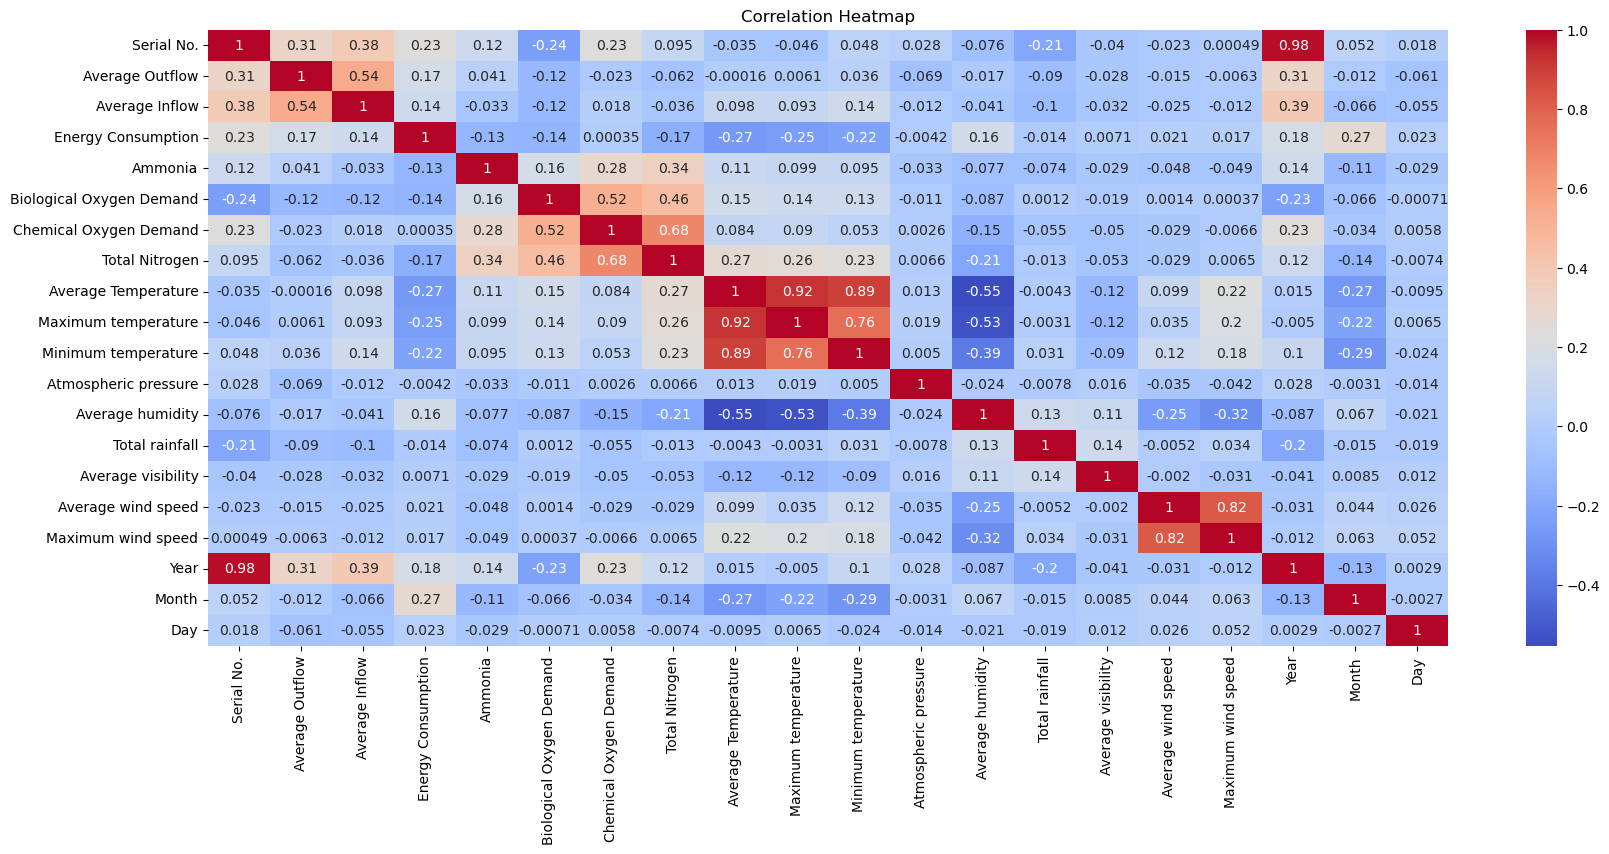

In [12]:
plt.figure(figsize=(20, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

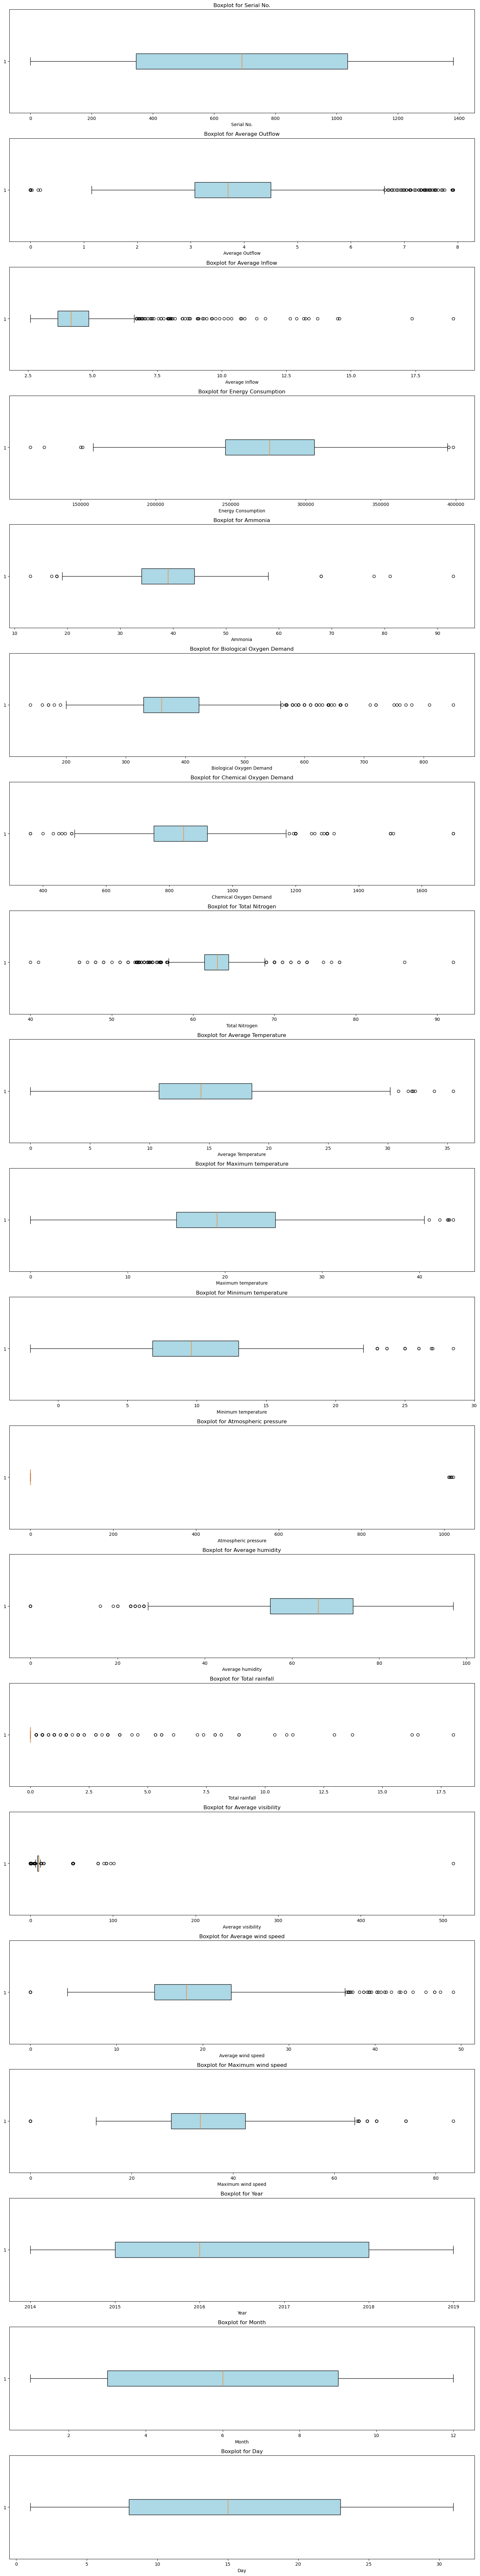

In [13]:
#Checking outliers using boxplots
def plot_boxplots(df):
    numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
    
    # Plotting boxplots
    plt.figure(figsize=(15, len(numerical_features) * 4))
    for i, col in enumerate(numerical_features):
        plt.subplot(len(numerical_features), 1, i + 1)
        plt.boxplot(df[col].dropna(), vert=False, patch_artist=True, 
                    boxprops=dict(facecolor='lightblue'))
        plt.title(f"Boxplot for {col}")
        plt.xlabel(col)
    plt.tight_layout()
    plt.show()
plot_boxplots(df)

In [14]:

#Preparing the features and target

In [15]:
X = df.drop(["Energy Consumption"], axis=1)
y = (df["Energy Consumption"] > df["Energy Consumption"].median()).astype(int).values  # Binarizing target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
X_train

,Serial No.,Average Outflow,Average Inflow,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,Year,Month,Day
415,415,3.454,3.390,46.0,503.5,1007.0,64.477,11.1,15.0,8.6,0.0,72,0.0,9.8,7.4,13.0,2015,8,26
371,371,3.022,3.105,45.0,450.0,900.0,63.729,11.4,13.0,10.0,0.0,74,0.0,10.0,13.1,27.8,2015,6,25
716,716,3.781,4.783,41.0,380.0,660.0,60.629,9.8,15.0,4.0,0.0,66,0.0,10.0,18.0,29.4,2016,10,27
1089,1089,4.848,8.777,39.0,310.0,840.0,64.412,16.5,20.0,14.8,0.0,70,0.0,10.0,23.2,44.6,2018,4,15
1107,1107,3.087,3.927,43.0,340.0,950.0,61.118,5.5,12.0,6.0,0.0,77,0.0,5.5,24.5,46.2,2018,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,1095,3.049,3.780,43.0,360.0,880.0,63.949,21.6,28.0,14.0,0.0,35,0.0,0.0,28.2,46.5,2018,4,23
1130,1130,2.987,3.838,34.0,330.0,930.0,63.821,11.3,15.0,7.0,0.0,73,0.0,10.0,21.7,38.9,2018,6,12
1294,1294,4.528,4.638,38.0,380.0,940.0,70.000,16.4,23.0,11.0,0.0,63,0.0,10.0,16.1,27.8,2019,2,20
860,860,6.207,4.209,50.0,470.0,990.0,65.114,13.4,17.0,11.7,0.0,67,0.0,10.0,16.5,33.5,2017,5,24


In [17]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [18]:
# Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
X_train

array([[-0.69070518, -0.39012506, -0.77201094, ..., -0.79359662,
         0.52210718,  1.20852014],
       [-0.79957744, -0.73931256, -0.97041518, ..., -0.79359662,
        -0.0594739 ,  1.09387258],
       [ 0.05408009, -0.12580953,  0.19773328, ..., -0.16945123,
         1.10368826,  1.3231677 ],
       ...,
       [ 1.48426576,  0.47799385,  0.09679078, ...,  1.70298491,
        -1.22263607,  0.52063479],
       [ 0.41038932,  1.83513693, -0.20185981, ...,  0.45469415,
        -0.35026444,  0.97922503],
       [ 1.06857166,  0.19832053, -0.37729093, ...,  1.07883953,
        -0.0594739 , -1.08443102]])

In [20]:
#Logistic Regression from scratch
# Step 1: Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Step 2: Binary Cross-Entropy Loss
def compute_loss(y, y_pred):
    m = y.shape[0]
    loss = -1 / m * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return loss

# Step 3: Logistic Regression Class Implementation
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        # Initialize weights and bias
        n_features = X.shape[1]
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        m = X.shape[0]  # Number of samples
        
        # Gradient Descent
        for _ in range(self.epochs):
            # Linear model
            z = np.dot(X, self.weights) + self.bias
            # Sigmoid activation
            y_pred = sigmoid(z)
            # Computing gradients
            dw = 1 / m * np.dot(X.T, (y_pred - y))
            db = 1 / m * np.sum(y_pred - y)
            # Updating weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    def predict(self, X):
        # Predicting probabilities
        z = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(z)
        # Converting probabilities to class labels
        return np.where(y_pred > 0.5, 1, 0)

# Step 4: Train Logistic Regression from Scratch
model = LogisticRegressionScratch(learning_rate=0.01, epochs=1000)
model.fit(X_train,y_train)

# Step 5: Evaluate the Model
y_pred = model.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1-Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.703971119133574
F1-Score: 0.6985294117647058
Confusion Matrix:
 [[100  35]
 [ 47  95]]


In [21]:
# Logistic Regression using sklearn
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred_log))

Logistic Regression Accuracy: 0.6895306859205776


In [22]:
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_log))
print('Classification Report:\n', classification_report(y_test, y_pred_log))

Confusion Matrix:
 [[96 39]
 [47 95]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.71      0.69       135
           1       0.71      0.67      0.69       142

    accuracy                           0.69       277
   macro avg       0.69      0.69      0.69       277
weighted avg       0.69      0.69      0.69       277



In [24]:
#Hyperparameter Tuning
# Parameter grid for Logistic Regression
param_dist = {
    'C': uniform(loc=0.1, scale=10),  # Randomly sample values for C from 0.1 to 10
    'penalty': ['l2', 'l1', 'elasticnet'],  # Penalties
    'solver': ['lbfgs', 'saga'],  # Solvers
    'max_iter': [1000, 2000, 3000]  # Increase max_iter to avoid convergence issues
}

# Logistic Regression model
logistic_model = LogisticRegression()

# RandomizedSearchCV setup
random_search_lr = RandomizedSearchCV(
    estimator=logistic_model,
    param_distributions=param_dist,
    n_iter=50,  # Number of combinations to try
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search_lr.fit(X_train, y_train)

# Best parameters and accuracy
print("Logistic Regression Best Parameters:", random_search_lr.best_params_)
print("Logistic Regression Best Accuracy:", random_search_lr.best_score_)

Logistic Regression Best Parameters: {'C': 8.522847745949985, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'saga'}
Logistic Regression Best Accuracy: 0.6316742081447962


In [25]:
best_logistic_model = LogisticRegression(**random_search_lr.best_params_)
best_logistic_model.fit(X_train, y_train)

test_accuracy = best_logistic_model.score(X_test, y_test)
print("Test Accuracy with Best Parameters:", test_accuracy)

Test Accuracy with Best Parameters: 0.6931407942238267


In [26]:
# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print('KNN Accuracy:', accuracy_score(y_test, y_pred_knn))

KNN Accuracy: 0.6931407942238267


In [27]:
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_knn))
print('Classification Report:\n', classification_report(y_test, y_pred_knn))

Confusion Matrix:
 [[ 89  46]
 [ 39 103]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.66      0.68       135
           1       0.69      0.73      0.71       142

    accuracy                           0.69       277
   macro avg       0.69      0.69      0.69       277
weighted avg       0.69      0.69      0.69       277



In [28]:
#Hyperparameter Tuning
# Parameter grid for KNN
param_dist = {
    'n_neighbors': range(1, 30),  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metrics
}

# KNN model
knn_model = KNeighborsClassifier()

# RandomizedSearchCV setup
random_search_knn = RandomizedSearchCV(
    estimator=knn_model,
    param_distributions=param_dist,
    n_iter=50,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search_knn.fit(X_train, y_train)

# Best parameters and accuracy
print("KNN Best Parameters:", random_search_knn.best_params_)
print("KNN Best Accuracy:", random_search_knn.best_score_)

KNN Best Parameters: {'weights': 'distance', 'n_neighbors': 28, 'metric': 'manhattan'}
KNN Best Accuracy: 0.6959276018099547


In [29]:
best_knn_model = KNeighborsClassifier(**random_search_knn.best_params_)
best_knn_model.fit(X_train, y_train)

test_accuracy_knn = best_knn_model.score(X_test, y_test)
print("KNN Test Accuracy with Best Parameters:", test_accuracy_knn)

KNN Test Accuracy with Best Parameters: 0.6931407942238267


In [30]:
# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print('Decision Tree Accuracy:', accuracy_score(y_test, y_pred_dt))

Decision Tree Accuracy: 0.6606498194945848


In [31]:
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_dt))
print('Classification Report:\n', classification_report(y_test, y_pred_dt))

Confusion Matrix:
 [[97 38]
 [56 86]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.72      0.67       135
           1       0.69      0.61      0.65       142

    accuracy                           0.66       277
   macro avg       0.66      0.66      0.66       277
weighted avg       0.66      0.66      0.66       277



In [32]:
#Hyperparameter Tuning
# Parameter grid for Decision Tree
param_dist = {
    'criterion': ['gini', 'entropy', 'log_loss'],  # Splitting criteria
    'max_depth': range(1, 20),  # Tree depth
    'min_samples_split': range(2, 10),  # Minimum samples required to split
    'min_samples_leaf': range(1, 10)  # Minimum samples per leaf
}

# Decision Tree model
dt_model = DecisionTreeClassifier()

# RandomizedSearchCV setup
random_search_dt = RandomizedSearchCV(
    estimator=dt_model,
    param_distributions=param_dist,
    n_iter=50,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search_dt.fit(X_train, y_train)

# Best parameters and accuracy
print("Decision Tree Best Parameters:", random_search_dt.best_params_)
print("Decision Tree Best Accuracy:", random_search_dt.best_score_)

Decision Tree Best Parameters: {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 4, 'criterion': 'log_loss'}
Decision Tree Best Accuracy: 0.6606334841628959


In [33]:
best_dt_model = DecisionTreeClassifier(**random_search_dt.best_params_)
best_dt_model.fit(X_train, y_train)

test_accuracy_dt = best_dt_model.score(X_test, y_test)
print("Decision Tree Test Accuracy with Best Parameters:", test_accuracy_dt)

Decision Tree Test Accuracy with Best Parameters: 0.6895306859205776


In [34]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print('Random Forest Accuracy:', accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.7436823104693141


In [35]:
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_rf))
print('Classification Report:\n', classification_report(y_test, y_pred_rf))

Confusion Matrix:
 [[103  32]
 [ 39 103]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.76      0.74       135
           1       0.76      0.73      0.74       142

    accuracy                           0.74       277
   macro avg       0.74      0.74      0.74       277
weighted avg       0.74      0.74      0.74       277



In [36]:
#Hyperparameter Tuning
# Parameter grid for Random Forest
param_dist = {
    'n_estimators': range(10, 200, 10),  # Number of trees
    'criterion': ['gini', 'entropy'],  # Splitting criteria
    'max_depth': range(1, 20),  # Maximum depth of the trees
    'min_samples_split': range(2, 10),  # Minimum samples required to split
    'min_samples_leaf': range(1, 10),  # Minimum samples per leaf
    'bootstrap': [True, False]  # Bootstrap samples
}

# Random Forest model
rf_model = RandomForestClassifier()

# RandomizedSearchCV setup
random_search_rf = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=50,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search_rf.fit(X_train, y_train)

# Best parameters and accuracy
print("Random Forest Best Parameters:", random_search_rf.best_params_)
print("Random Forest Best Accuracy:", random_search_rf.best_score_)

Random Forest Best Parameters: {'n_estimators': 190, 'min_samples_split': 5, 'min_samples_leaf': 8, 'max_depth': 11, 'criterion': 'gini', 'bootstrap': False}
Random Forest Best Accuracy: 0.7357466063348417


In [37]:
best_rf_model = RandomForestClassifier(**random_search_rf.best_params_)
best_rf_model.fit(X_train, y_train)

test_accuracy_rf = best_rf_model.score(X_test, y_test)
print("Random Forest Test Accuracy with Best Parameters:", test_accuracy_rf)

Random Forest Test Accuracy with Best Parameters: 0.7364620938628159


In [38]:
# Support Vector Machine
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print('SVM Accuracy:', accuracy_score(y_test, y_pred_svm))

SVM Accuracy: 0.7111913357400722


In [39]:
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_svm))
print('Classification Report:\n', classification_report(y_test, y_pred_svm))

Confusion Matrix:
 [[ 92  43]
 [ 37 105]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.68      0.70       135
           1       0.71      0.74      0.72       142

    accuracy                           0.71       277
   macro avg       0.71      0.71      0.71       277
weighted avg       0.71      0.71      0.71       277



In [40]:
#Hyperparameter Tuning
# Parameter grid for SVM
param_dist = {
    'C': uniform(loc=0.1, scale=10),  # C values from 0.1 to 10
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernel types
    'gamma': ['scale', 'auto'],  # Kernel coefficient
    'degree': range(2, 6)  # Polynomial degree (used with 'poly' kernel)
}

# SVM model
svm_model = SVC()

# RandomizedSearchCV setup
random_search_svm = RandomizedSearchCV(
    estimator=svm_model,
    param_distributions=param_dist,
    n_iter=50,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search_svm.fit(X_train, y_train)

# Best parameters and accuracy
print("SVM Best Parameters:", random_search_svm.best_params_)
print("SVM Best Accuracy:", random_search_svm.best_score_)

SVM Best Parameters: {'C': 1.0541011649041132, 'degree': 4, 'gamma': 'scale', 'kernel': 'rbf'}
SVM Best Accuracy: 0.6660633484162896


In [41]:
best_svm_model = SVC(**random_search_svm.best_params_)
best_svm_model.fit(X_train, y_train)

test_accuracy_svm = best_svm_model.score(X_test, y_test)
print("SVM Test Accuracy with Best Parameters:", test_accuracy_svm)

SVM Test Accuracy with Best Parameters: 0.7111913357400722
